In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from main_classes.DataRetriever import load_npz
from main_classes.ResultDisplayer import (
    plot_pred,
    plot_prediction,
    plot_mcdropout,
    plot_config_prediction
)

In [4]:
posscan = "PosScan"
test_features_slopes = "test_features_slopes"
test_features_lin = "test_features_lin"
test_features_pl = "test_features_pl"
test_features_local_slopes = "test_features_local_slopes"
test_features_GL_slopes = "test_features_GL_slopes"
test_features_LC = "test_features_LC"
FOVSOS_FS = "FovSOS-FS"

In [5]:
horizons = {
    1: {
        "MCD": [1, 1], #[N, Nt]
        "PosScan": [1, 1], #[N, Nt]
        "FovSOS-FS": [1, 1],
        "FovSOS-FS_DirectPred": [1, 1],
    },
    5: {
        "MCD": [5, 1],
        "PosScan": [5, 1],
        "FovSOS-FS": [5, 1],
        "FovSOS-FS_DirectPred": [1, 5],
    },
    11: {
        "MCD": [11, 1],
        "PosScan": [11, 1],
        "FovSOS-FS": [11, 1],
        "FovSOS-FS_DirectPred": [1, 11],
    },
    20: {
        "MCD": [20, 1],
        "PosScan": [20, 1],
        "FovSOS-FS": [20, 1],
        "FovSOS-FS_DirectPred": [1, 20],
    }
    
}

In [6]:
RESULTS_FOLDER = "../results/"
SAVE_FOLDER = f"../results_plots/model_comparison/"
is_save = False

In [7]:
!ls ../results_plots/model_comparison

ground_truth
MSE_bar_model_comparison_nofov.png
MSE_bar_model_comparison.png
multimatch_direction_bar_model_comparison.png
multimatch_direction_dist_model_comparison.png
multimatch_duration_bar_model_comparison.png
multimatch_duration_dist_model_comparison.png
multimatch_length_bar_model_comparison.png
multimatch_length_dist_model_comparison.png
multimatch_position_bar_model_comparison.png
multimatch_position_dist_model_comparison.png
multimatch_shape_bar_model_comparison.png
multimatch_shape_dist_model_comparison.png
peak_x_bar_model_comparison_nofov.png
peak_x_bar_model_comparison.png
peak_y_bar_model_comparison_nofov.png
peak_y_bar_model_comparison.png
scanmatch_bar_model_comparison_nofov.png
scanmatch_bar_model_comparison.png
v2


In [8]:
#RESULTS_FOLDER_FOVSOS_FS_DirectPred = "../results/FovSOS-FS_DirectPred"
#RESULTS_FOLDER_FOVSOS_FS = "../results/FovSOS-FS"
# Agregar LC
# Ver como agregar saliencias
MODEL_NAMES = [
    posscan,
    test_features_LC,
    test_features_slopes,
    test_features_lin,
    test_features_pl,
    test_features_local_slopes,
    test_features_GL_slopes,
    FOVSOS_FS
    #RESULTS_FOLDER_FOVSOS_FS_DirectPred,
    #RESULTS_FOLDER_FOVSOS_FS
]

RESULTS_FOLDERS = [os.path.join(RESULTS_FOLDER, folder) for folder in MODEL_NAMES]

In [9]:
RESULTS_FOLDERS

['../results/PosScan',
 '../results/test_features_LC',
 '../results/test_features_slopes',
 '../results/test_features_lin',
 '../results/test_features_pl',
 '../results/test_features_local_slopes',
 '../results/test_features_GL_slopes',
 '../results/FovSOS-FS']

In [10]:
# Params
#N = 11
#Nt = 1 
#SEQ, INuts, LR, EPOCHS, PAT = 10, 30, 0.0001, 500, 15

N = 11
Nt = 1 #11
SEQ, INuts, LR, EPOCHS, PAT = 10, 30, 0.0001, 5000, 150
tIMG = "natural"

# Subjects
SUBJECTS = ["s605", "s620", "s622"] #s605, s617, s620
#SUBJECTS = ["s605", "s609", "s613"]
#SUBJECTS = ["s605"] #s605, s617, s620
#SUBJECTS = ["s605", "s609", "s611", "s613", "s616", "s617", "s619", "s620"]
#SUBJECTS = ["s605", "s609", "s611", "s613", "s616"]

In [11]:
x_lims = {
    #"natural":  (1222, 1328),
    "natural":  (3400, 4500),
    #"natural":  (5200, 5300),
    #"natural":  (7500, 8000),
    #"natural":  (9300, 9400),
    #"natural": (10000, 12000),
    "grey": (10000, 15000),
    "black": (10000, 15000),
    "white": (10000, 15000),
    "white_noise": (10000, 15000),
    "pink_noise": (10000, 15000),
    "inverted": (10000, 15000),
}

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


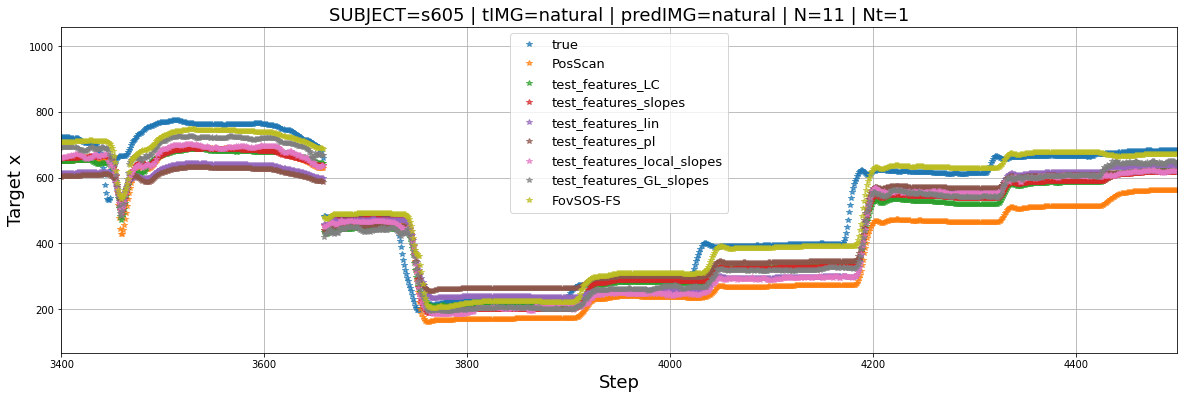

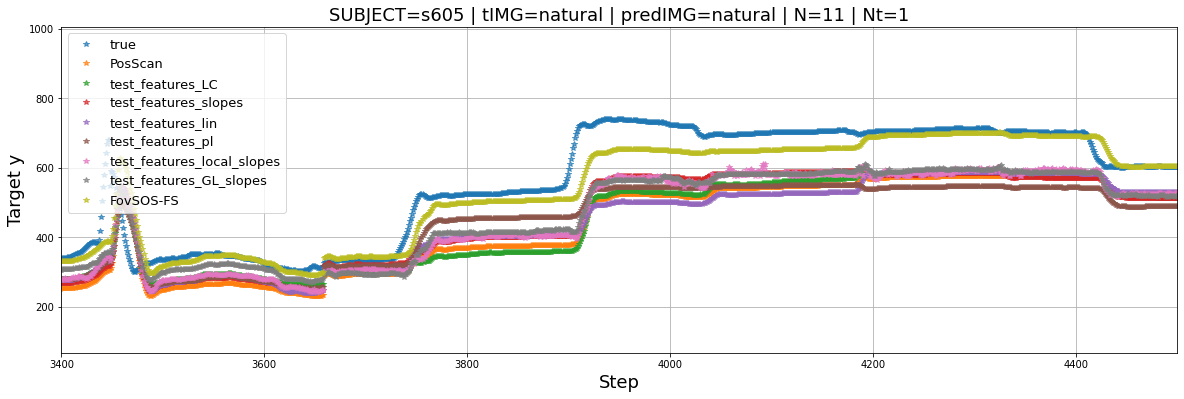

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


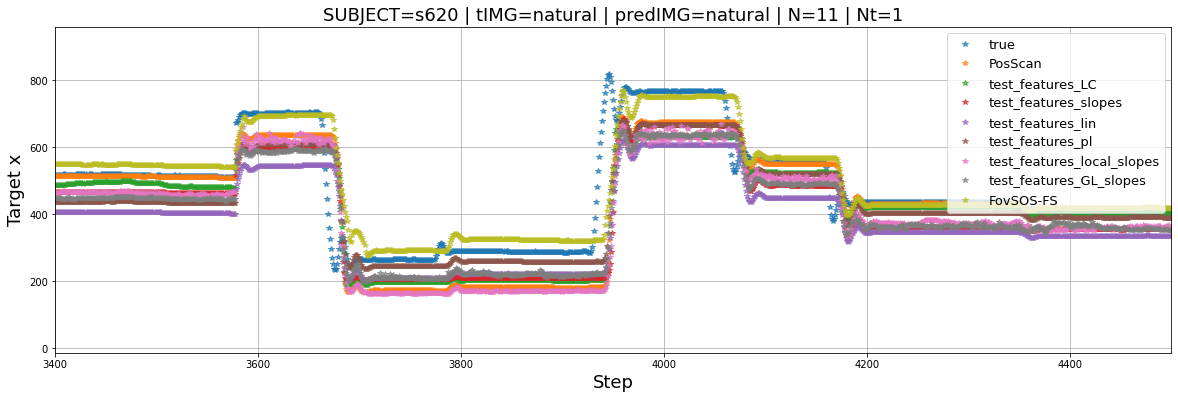

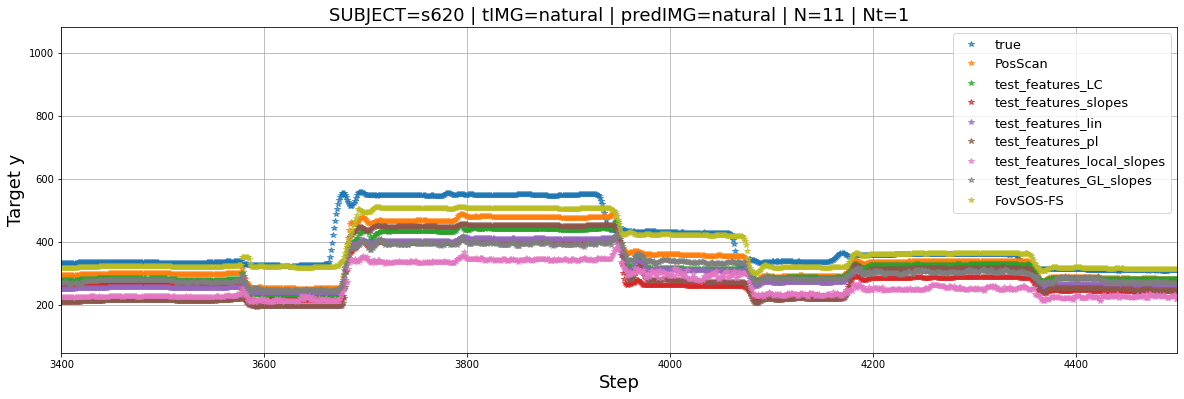

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


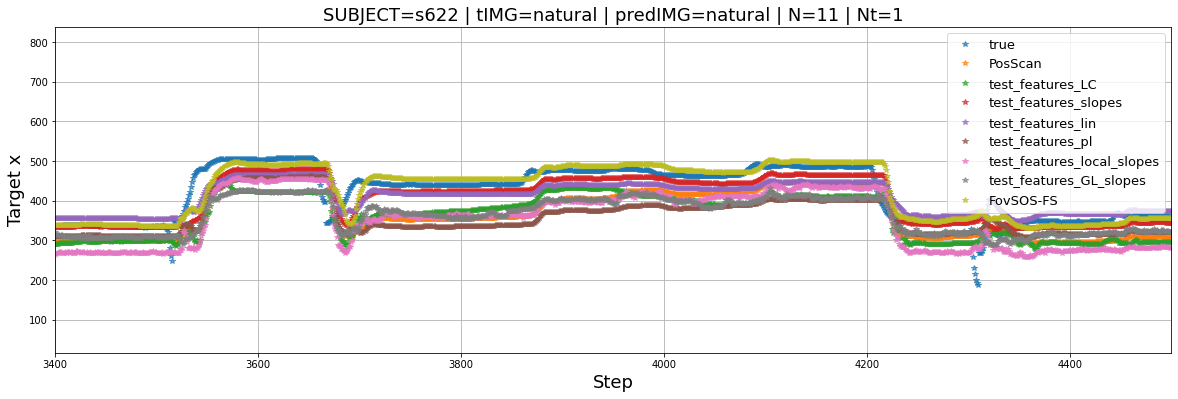

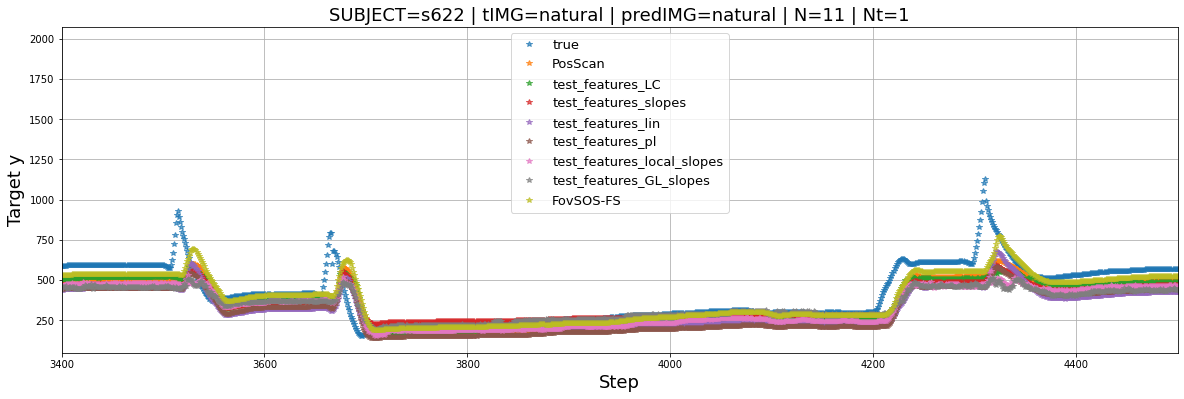

In [12]:
for subject_train in SUBJECTS:
    # Folders
    train_path = f"SUBJECT_{subject_train}-tIMG_{tIMG}-N_{N}-Nt_{Nt}-"#-SEQ_{SEQ}-InUts_{INuts}-LR_{LR}-EPOCHS_{EPOCHS}-PAT_{PAT}
    #folder_paths = [os.path.join(RESULTS_FOLDER, train_path) for RESULTS_FOLDER in RESULTS_FOLDERS]
    #for predIMG in ["natural", "grey", "black", "inverted", "white_noise", "pink_noise", "white"]:
    for predIMG in ["natural"]:
        x_lim = x_lims.get(predIMG, None)
        # Load results
        results_dict = {}
        for results_folder in RESULTS_FOLDERS:
            subject_folder = train_path + "-".join(os.listdir(results_folder)[0].split("-")[4:])
            folder_path = os.path.join(results_folder, subject_folder)
            y_real, y_pred = load_npz(folder_path, predIMG, get_mcdropout_results=False)
            y_real.reset_index(inplace=True, drop=True)
            y_pred.reset_index(inplace=True, drop=True)
            results_dict["y_real"] = y_real
            results_dict[folder_path.split("/")[-2]] = y_pred

        # Plot
        for x_or_y in ["x", "y"]:
            fig = plt.figure(figsize=(20,6))
            plt.plot(results_dict["y_real"][x_or_y], 'C0*', label='true', alpha=0.7)
            for i, key in enumerate(results_dict.keys()):
                if key != "y_real":
                    plt.plot(results_dict[key][x_or_y], f'C{i}*', label=key, alpha=0.7)
            plt.legend(loc='best', prop={'size': 13})
            plt.grid()
            plt.ylabel(f"Target {x_or_y}", fontsize=18)
            plt.xlabel("Step", fontsize=18)
            plt.title(f"SUBJECT={subject_train} | tIMG={tIMG} | predIMG={predIMG} | N={N} | Nt={Nt}", fontsize=18)
            if x_lim:
                plt.xlim(x_lim[0], x_lim[1])
            plt.show()

In [13]:
from main_classes.DataRetriever import DataGetter, DataSearcher 
import re
import json

In [14]:
models_all_results = {}
for model_name in MODEL_NAMES:
    print("working on:", model_name)
    regex = re.compile(r'results_all_\d.+.json')
    results_name = list(filter(regex.search, os.listdir(f'../results/assets/{model_name}/')))[0]
    with open(f'../results/assets/{model_name}/{results_name}') as data_file: 
        all_results = json.load(data_file)
    models_all_results[model_name] = all_results

working on: PosScan
working on: test_features_LC
working on: test_features_slopes
working on: test_features_lin
working on: test_features_pl
working on: test_features_local_slopes
working on: test_features_GL_slopes
working on: FovSOS-FS


In [15]:
searcher = DataSearcher()

In [16]:
x_lim_right = {
    "MSE": {
        1: 1e4,
        5: 1e4,
        11: 2e4,
        20: 4e4
    },
    "scanmatch": {
        1: 1,
        5: 1,
        11: 1,
        20: 1
    }
}
y_lim_upper = {
    "scanmatch": {
        1: 50,
        5: 50,
        11: 50,
        20: 50
    }
}

img_type = "natural"
kind = "bar"

No handles with labels found to put in legend.


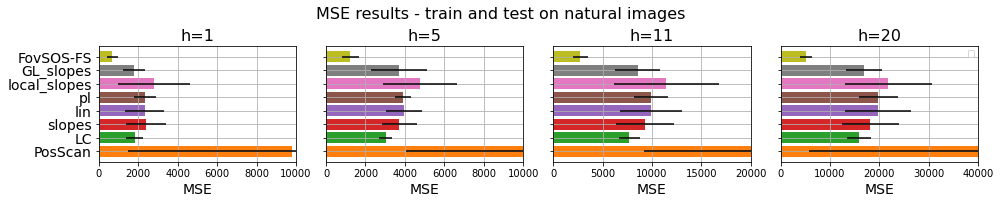

No handles with labels found to put in legend.


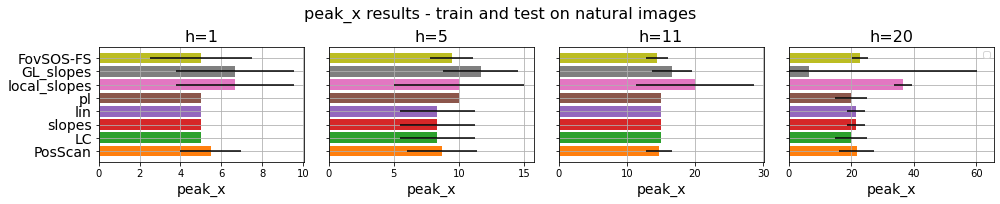

No handles with labels found to put in legend.


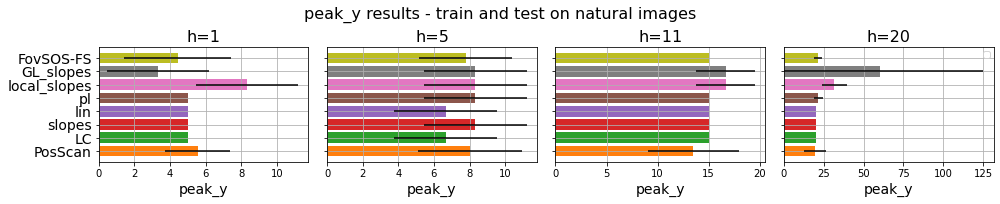

No handles with labels found to put in legend.


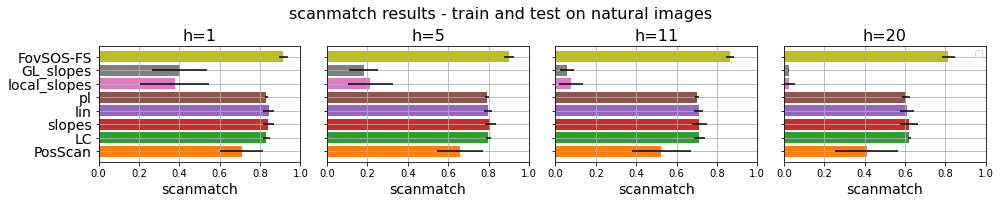

In [17]:
for metric in ["MSE", "peak_x", "peak_y", "scanmatch"]:
    fig, ax = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
    for i, h in enumerate([1, 5, 11, 20]):
        for j, model_name in enumerate(MODEL_NAMES):
            horizon_arr = horizons[h].get(model_name, None)
            all_results = models_all_results[model_name]
            if horizon_arr:
                N, Nt = horizon_arr
            else:
                N, Nt = h, 1
            df = searcher.get_results_by_query(all_results, 
                             metric=metric, 
                             subject=None, 
                             tIMG=None, 
                             N=N,
                             Nt=Nt, 
                             predIMG=img_type
                            )
            if (not df.empty) and (not pd.isna(df[0]).all()):
                model_name = model_name.split("test_features_")[-1]
                if kind == "bar":
                    ax[i].barh(model_name, df[0].mean(), xerr=df[0].std(), color=f"C{j+1}")
                if df[0].std() != 0:
                    if kind == "dist":
                        sns.kdeplot(df[0], ax=ax[i], label=model_name, color=f"C{j+1}")
                    if kind == "cumdist":
                        sns.kdeplot(df[0], ax=ax[i], label=model_name, cumulative=True, color=f"C{j+1}")
                else:
                    if kind == "dist":
                        ax[i].axvline(x=df[0].mean(), label=model_name, color=f"C{j+1}")
                    if kind == "cumdist":
                        ax[i].axhline(y=df[0].mean(), label=model_name, color=f"C{j+1}")  
            else:
                if kind == "bar":
                    ax[i].barh(img_type, 0.0, xerr=0.0, color=f"C{j+1}")
                if kind == "dist":
                    ax[i].axvline(x=0.0, label=model_name, color=f"C{j+1}")
                if kind == "cumdist":
                    ax[i].axhline(y=0.0, label=model_name, color=f"C{j+1}")  
        right_lim = x_lim_right.get(metric, None)
        upper_lim = y_lim_upper.get(metric, None)
        if right_lim:
            ax[i].set_xlim(right=right_lim[h])
        if kind != "bar":
            if upper_lim:
                ax[i].set_ylim(top=upper_lim[h])
        ax[i].set_xlim(left=0)
        ax[i].set_title(f"h={h}", fontsize=16)
        ax[i].grid()
        ax[i].set_xlabel(metric, fontsize=14)
        ax[i].tick_params(axis='y', labelsize=14)
    ax[i].legend(prop={"size":8})
    fig.suptitle(f"{metric} results - train and test on natural images", y=0.93, fontsize=16)
    fig.tight_layout()
    if True:
        if not os.path.exists(SAVE_FOLDER):
            os.makedirs(SAVE_FOLDER)
        fig.savefig(f"{os.path.join(SAVE_FOLDER, f'{metric}_{kind}_model_comparison')}.png")
    plt.show()

In [18]:
MULTIMATCH_DIMS = ["shape", "direction", "length", "position", "duration"]
kind = "bar"

No handles with labels found to put in legend.


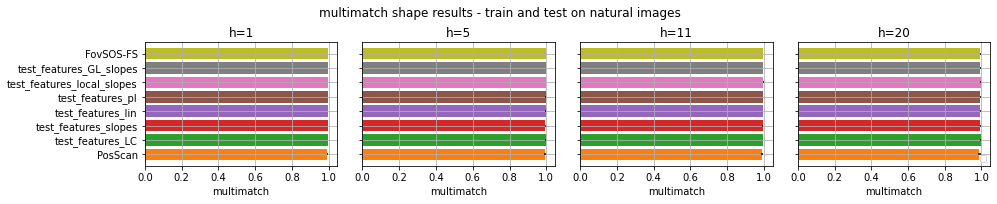

No handles with labels found to put in legend.


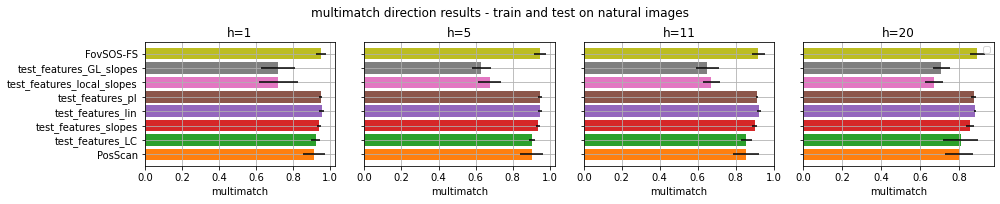

No handles with labels found to put in legend.


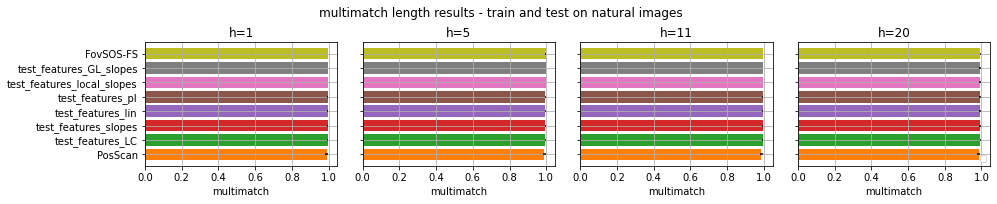

No handles with labels found to put in legend.


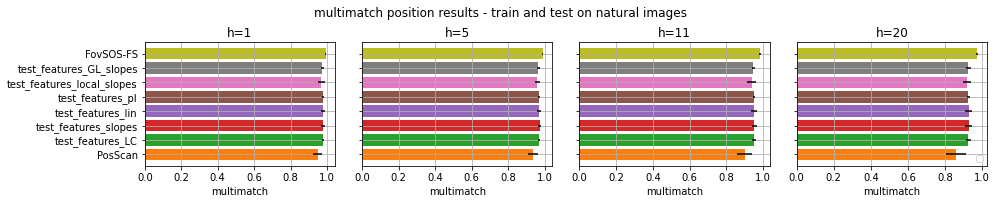

No handles with labels found to put in legend.


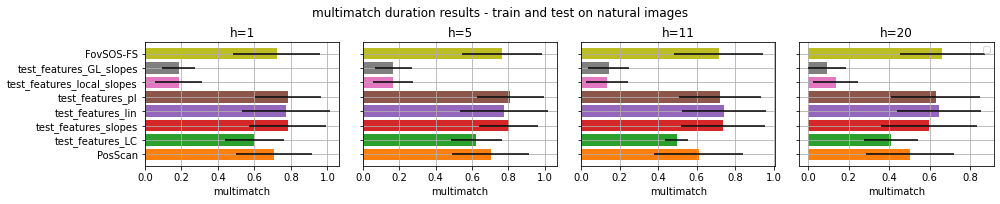

In [19]:
metric = "multimatch"
for m_dim, multimatch_dim in enumerate(MULTIMATCH_DIMS):
    fig, ax = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
    for i, h in enumerate([1, 5, 11, 20]):
        for j, model_name in enumerate(MODEL_NAMES):
            horizon_arr = horizons[h].get(model_name, None)
            all_results = models_all_results[model_name]
            if horizon_arr:
                N, Nt = horizon_arr
            else:
                N, Nt = h, 1
            df = searcher.get_results_by_query(all_results, 
                             metric=metric, 
                             subject=None, 
                             tIMG=None, 
                             N=N,
                             Nt=Nt, 
                             predIMG=img_type
                            )[0].apply(pd.Series)
            if (not df.empty) and (not pd.isna(df[0]).all()):
                if kind == "bar":
                    ax[i].barh(model_name, df[m_dim].mean(), xerr=df[m_dim].std(), color=f"C{j+1}")
                if kind == "dist":
                    sns.kdeplot(df[m_dim], ax=ax[i], label=model_name, color=f"C{j+1}")
                if kind == "cumdist":
                    sns.kdeplot(df[m_dim], ax=ax[i], label=model_name, cumulative=True, color=f"C{j+1}")
            else:
                if kind == "bar":
                    ax[i].barh(model_name, 0.0, xerr=0.0, color=f"C{j+1}")
                if kind == "dist":
                    ax[i].axvline(x=0.0, label=model_name, color=f"C{j+1}")
                if kind == "cumdist":
                    ax[i].axhline(y=0.0, label=model_name, color=f"C{j+1}")   
        right_lim = x_lim_right.get(metric, None)
        if right_lim:
            ax[i].set_xlim(right=right_lim[h])
        #ax[i].set_xlim(left=None)
        ax[i].set_title(f"h={h}")
        ax[i].grid()
        ax[i].set_xlabel(metric)
    ax[i].legend(prop={"size":8})
    fig.suptitle(f"{metric} {multimatch_dim} results - train and test on natural images", y=0.93)
    fig.tight_layout()
    if is_save:
        if not os.path.exists(SAVE_FOLDER):
            os.makedirs(SAVE_FOLDER)
        fig.savefig(f"{os.path.join(SAVE_FOLDER, f'{metric}_{multimatch_dim}_{kind}_model_comparison')}.png")
    plt.show()

In [20]:
df = searcher.get_results_by_query(all_results, 
                             metric=metric, 
                             subject=None, 
                             tIMG=None, 
                             N=1,
                             Nt=1, 
                             predIMG=None
                            )[0].apply(pd.Series)

In [21]:
df

,0,1,2,3,4
SUBJECT_s605-tIMG_natural-N_1-Nt_1-SEQ_10-InUts_30-LR_0.0001-EPOCHS_5000-PAT_150-predIMG_black,0.997113,0.943644,0.996752,0.945910,0.600000
SUBJECT_s605-tIMG_natural-N_1-Nt_1-SEQ_10-InUts_30-LR_0.0001-EPOCHS_5000-PAT_150-predIMG_grey,0.996666,0.936790,0.994863,0.939417,0.608696
SUBJECT_s605-tIMG_natural-N_1-Nt_1-SEQ_10-InUts_30-LR_0.0001-EPOCHS_5000-PAT_150-predIMG_inverted,0.995444,0.957689,0.994151,0.966399,0.924242
SUBJECT_s605-tIMG_natural-N_1-Nt_1-SEQ_10-InUts_30-LR_0.0001-EPOCHS_5000-PAT_150-predIMG_natural,0.997045,0.962379,0.996474,0.992416,0.807453
SUBJECT_s605-tIMG_natural-N_1-Nt_1-SEQ_10-InUts_30-LR_0.0001-EPOCHS_5000-PAT_150-predIMG_pink_noise,0.992473,0.943712,0.988671,0.946191,0.585714
...,...,...,...,...,...
SUBJECT_s622-tIMG_natural-N_1-Nt_1-SEQ_10-InUts_30-LR_0.0001-EPOCHS_5000-PAT_150-predIMG_inverted,0.997105,0.935859,0.996752,0.984784,0.625000
SUBJECT_s622-tIMG_natural-N_1-Nt_1-SEQ_10-InUts_30-LR_0.0001-EPOCHS_5000-PAT_150-predIMG_natural,0.997208,0.938958,0.996578,0.993257,0.500000
SUBJECT_s622-tIMG_natural-N_1-Nt_1-SEQ_10-InUts_30-LR_0.0001-EPOCHS_5000-PAT_150-predIMG_pink_noise,0.996210,0.934151,0.995601,0.985260,0.625000
SUBJECT_s622-tIMG_natural-N_1-Nt_1-SEQ_10-InUts_30-LR_0.0001-EPOCHS_5000-PAT_150-predIMG_white,0.997264,0.678080,0.997404,0.894436,0.333333


NameError: name 'IMG_TYPES' is not defined

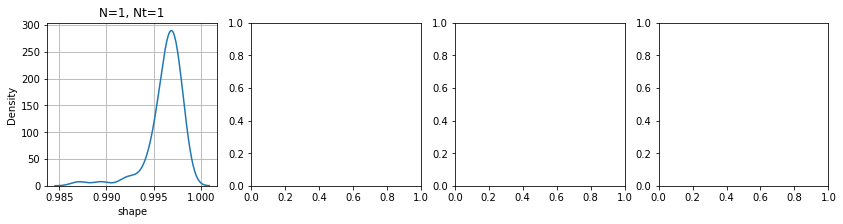

In [22]:
metric = "multimatch"
MULTIMATCH_DIMS = ["shape", "direction", "length", "position", "duration"]

for m_dim, multimatch_dim in enumerate(MULTIMATCH_DIMS):
    fig, ax = plt.subplots(1, 4, figsize=(14, 3))
    #fig, ax = plt.subplots(1, 3, figsize=(14, 3))
    for i, N in enumerate([1, 5, 11, 20]):
    #for i, Nt in enumerate([5, 11, 20]):
    #for i, Nt in enumerate([1]):
        #if Nt == 1:
        #    continue
        arr_type = []
        #for img_type in ['natural', 'inverted',  'pink_noise', 'white_noise', 'white', 'black', 'grey']:
        for img_type in ['natural']:
            df = searcher.get_results_by_query(all_results, 
                             metric=metric, 
                             subject=None, 
                             tIMG=img_type, 
                             N=1, 
                             Nt=Nt, 
                             predIMG=None
                            )[0].apply(pd.Series)
            mu, sigma = df[m_dim].mean(), df[m_dim].std()
            x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
            #ax[i].plot(x, stats.norm.pdf(x, mu, sigma), label=img_type)
            sns.distplot(df[m_dim], ax=ax[i], label=img_type, hist=False, kde=True)
            arr_type.append([mu, sigma])
        ax[i].set_title(f"N={N}, Nt={Nt}")
        ax[i].grid()
        ax[i].set_xlabel(multimatch_dim)
        df_type = pd.DataFrame(arr_type, columns=["mu", "sigma"], index=IMG_TYPES)
        
        """
        print(metric, multimatch_dim, f"N={N}")
        print(df_type)
        print("-- max values --")
        print(df_type.idxmax())
        print("-- min values --")
        print(df_type.idxmin())
        print("-- rank max values --")
        print(df_type.rank(method="max", ascending=False))
        print()
        """
    ax[i].legend(prop={"size":8})
    plt.suptitle(f"{metric} {multimatch_dim} fitted gaussian grouping subjects by train image", y=1.0)
    fig.tight_layout()
    plt.show()